
# Transformaci√≥n de Cotizaciones en Rentabilidades

En econom√≠a y finanzas no solemos trabajar directamente con el **precio de cierre** de un activo, sino con su **rentabilidad**, es decir, cu√°nto ha subido o bajado en porcentaje respecto al d√≠a anterior.

## 1. Cotizaciones

Las **cotizaciones** son los precios de un activo (en este caso el √≠ndice S&P500) en diferentes momentos del tiempo.
Usaremos la columna **Close**, que indica el precio al cierre de cada jornada.

Ejemplo:

| Fecha       | Close |
| ----------- | ----- |
| 02-ene-2023 | 100   |
| 03-ene-2023 | 105   |
| 04-ene-2023 | 103   |

---

## 2. C√°lculo de la rentabilidad

La rentabilidad de un d√≠a se calcula como:

$$
r_t = \frac{P_t - P_{t-1}}{P_{t-1}}
$$

Donde:

* $P_t$ = precio de cierre de hoy.
* $P_{t-1}$ = precio de cierre de ayer.
* $r_t$ = rentabilidad diaria (en porcentaje).

---

## 3. Ejemplo con n√∫meros

Aplicando la f√≥rmula:

* D√≠a 2: $(105 - 100) / 100 = 0,05 = 5\%$
* D√≠a 3: $(103 - 105) / 105 \approx -0,019 = -1,9\%$

Resultado:

| Fecha       | Close | Rentabilidad |
|:-----------:|:-----:|:------------:|
| 02-ene-2023 | 100   | ‚Äì            |
| 03-ene-2023 | 105   | +5,0%        |
| 04-ene-2023 | 103   | -1,9%        |

---

## 4. Idea principal

* El **primer d√≠a** no tiene rentabilidad porque no hay un d√≠a anterior para comparar.
* A partir del **segundo d√≠a** podemos calcular la rentabilidad.
* Este cambio porcentual es la base para analizar riesgos, volatilidad y modelos predictivos en finanzas.




# PASO 1: CARGA DE DATOS S&P500


In [ ]:
import yfinance as yf
import pandas as pd

# 1. Ticker del S&P 500 (^GSPC)
# Nota: La pr√°ctica solicita 'S&P500', cuyo ticker es ^GSPC.
ticker_simbolo = "^GSPC"

# 2. Definir el per√≠odo de tiempo solicitado
# La pr√°ctica pide: desde el primer d√≠a despu√©s del 1/ene/2023
# hasta el 1/sep/2025 o el √∫ltimo d√≠a disponible antes.
fecha_inicio = "2023-01-02"  # Se usa el 2 de enero para asegurar que es 'posterior al 1 de enero'
fecha_fin = "2025-09-02"     # Se usa un d√≠a despu√©s del 1 de septiembre para incluir ese d√≠a

# 3. Descargar los datos de cotizaci√≥n
datos = yf.download(ticker_simbolo, start=fecha_inicio, end=fecha_fin)

# 4. Mostrar las primeras filas y verificar el tipo de dato
print("Primeras filas de los datos descargados:")
print(datos.head())
print("\n√öltimas filas de los datos descargados (para verificar la fecha final):")
print(datos.tail())


/tmp/ipython-input-2946094437.py:15: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(ticker_simbolo, start=fecha_inicio, end=fecha_fin)
[*********************100%***********************]  1 of 1 completed

Primeras filas de los datos descargados:
Price             Close         High          Low         Open      Volume
Ticker            ^GSPC        ^GSPC        ^GSPC        ^GSPC       ^GSPC
Date                                                                      
2023-01-03  3824.139893  3878.459961  3794.330078  3853.290039  3959140000
2023-01-04  3852.969971  3873.159912  3815.770020  3840.360107  4414080000
2023-01-05  3808.100098  3839.739990  3802.419922  3839.739990  3893450000
2023-01-06  3895.080078  3906.189941  3809.560059  3823.370117  3923560000
2023-01-09  3892.090088  3950.570068  3890.419922  3910.820068  4311770000

√öltimas filas de los datos descargados (para verificar la fecha final):
Price             Close         High          Low         Open      Volume
Ticker            ^GSPC        ^GSPC        ^GSPC        ^GSPC       ^GSPC
Date                                                                      
2025-08-25  6439.319824  6466.890137  6438.060059  6457.6699

### **¬øQu√© hemos realizado?**
El primer paso que hemos hecho es **descargar los datos del S&P500** (ticker `^GSPC`) desde Yahoo Finance, en el rango de fechas indicado:

* Desde el **primer d√≠a despu√©s del 1 de enero de 2023**.
* Hasta el **1 de septiembre de 2025** o el √∫ltimo d√≠a disponible antes.

Con esos datos luego trabajaremos para transformarlos en **rentabilidades** y realizar an√°lisis, pero lo primero es asegurarse de que los datos se descargan correctamente.


---

       
### **¬øQu√© hace nuestro c√≥digo?**

Primero, **importar librer√≠as**:

   ```python
   import yfinance as yf
   import pandas as pd
   ```

   * `yfinance`: para obtener datos hist√≥ricos de cotizaciones.
   * `pandas`: para manipularlos en forma de DataFrame.

Segundo,  **Definir el ticker** (para indicar que queremos los datos del S&P500, y no de por ejemplo el Dow Jones):

   ```python
   ticker_simbolo = "^GSPC"
   ```

   * El s√≠mbolo `^GSPC` corresponde al **S&P500** en Yahoo Finance.

Tercero, **Definir el per√≠odo de tiempo**

   ```python
   fecha_inicio = "2023-01-02"
   fecha_fin = "2025-09-02"
   ```

   * Se usa **2 de enero 2023** porque el 1 de enero no hay cotizaci√≥n (festivo).
   * Se usa el **2 de septiembre 2025** para asegurar incluir el **1 de septiembre 2025** en el rango.

Cuarto, **Descargar los datos**:

   ```python
   datos = yf.download(ticker_simbolo, start=fecha_inicio, end=fecha_fin)
   ```

   * Esto descarga un DataFrame con columnas como:

     * `Open`, `High`, `Low`, `Close`, `Adj Close`, `Volume`.
   * Cada fila corresponde a un d√≠a de cotizaci√≥n.

Por √∫ltimo, **Verificar datos descargados**, para ver si los datos descargados son correctos:

   ```python
   print(datos.head())  # primeras filas
   print(datos.tail())  # √∫ltimas filas
   ```

   * `head()`: permite comprobar que las fechas iniciales son correctas (ej. 2023-01-02, 2023-01-03, ‚Ä¶).
   * `tail()`: permite comprobar que se incluy√≥ la fecha l√≠mite (o el √∫ltimo dato disponible antes de ella).

# PASO 2: C√ÅLCULO DE RENTABILIDADES


In [ ]:
# Extraer solo los datos de cierre
precios_cierre = datos['Close']

# Calcular las rentabilidades seg√∫n la f√≥rmula: r_t = (P_t - P_{t-1}) / P_{t-1}
rentabilidades = (precios_cierre.diff() / precios_cierre.shift(1)).dropna()

# Mostrar resultados
print("Precios de cierre:")
print(precios_cierre.head(10))
print("\nRentabilidades calculadas (primeros valores):")
print(rentabilidades.head(10))

Precios de cierre:
Ticker            ^GSPC
Date                   
2023-01-03  3824.139893
2023-01-04  3852.969971
2023-01-05  3808.100098
2023-01-06  3895.080078
2023-01-09  3892.090088
2023-01-10  3919.250000
2023-01-11  3969.610107
2023-01-12  3983.169922
2023-01-13  3999.090088
2023-01-17  3990.969971

Rentabilidades calculadas (primeros valores):
Ticker         ^GSPC
Date                
2023-01-04  0.007539
2023-01-05 -0.011646
2023-01-06  0.022841
2023-01-09 -0.000768
2023-01-10  0.006978
2023-01-11  0.012849
2023-01-12  0.003416
2023-01-13  0.003997
2023-01-17 -0.002030
2023-01-18 -0.015563


Ahora explicaremos el significado de la serie de rentabilidades ($r_t$) que acabamos de calcular, contextualiz√°ndola en el **√°mbito financiero**.

Lo que se puede observar es que, en estos resultados num√©ricos, tenemos la medida clave en finanzas para evaluar el rendimiento de un activo: la rentabilidad diaria del √≠ndice S&P 500.

Cada valor en nuestra serie $r_t$ tiene el siguiente significado:
- $r_t$ representa el cambio relativo del precio de cierre del S&P 500 de un d√≠a ($P_{t-1}$) al siguiente ($P_t$). Un valor de, por ejemplo, 0.01 significa que el √≠ndice subi√≥ un 1% ese d√≠a; un valor de ‚àí0.005 significa que cay√≥ un 0.5%.

- Esta serie de rentabilidades es el punto de partida de nuestro an√°lisis, ya que contiene toda la informaci√≥n sobre el rendimiento hist√≥rico y el riesgo (volatilidad) del √≠ndice durante el periodo de estudio.

- En el contexto de nuestra pr√°ctica, $r_t$
  es la variable que queremos predecir. Al usar la rentabilidad en lugar del precio, evitamos muchos problemas asociados a que las series de precios no suelen ser estacionarias (su media y varianza cambian con el tiempo), lo cual es una ventaja para la modelizaci√≥n lineal.

En resumen: Hemos transformado una serie de precios absolutos (que solo se mueven hacia arriba en el largo plazo) en una serie de variaciones relativas (que fluct√∫an alrededor de cero) , lo que nos permite aplicar t√©cnicas de Aprendizaje Autom√°tico como la Regresi√≥n Lineal de manera m√°s efectiva para la predicci√≥n din√°mica.

Es as√≠ c√≥mo podemos pasar a la tarea A, una vez tenemos los datos ya descargados y las rentabilidades calculadas.

# **TAREA A: Tratamiento de Outliers y An√°lisis Descriptivo**

### 1. Tratamiento de Outliers (A.2) [Alberto]


In [ ]:
import numpy as np
# Asumimos que 'rentabilidades' es la serie r_t sin valores NaN

# 1. Calcular media y desviaci√≥n est√°ndar de la serie original (excluyendo el primer NaN si existe)
media = rentabilidades.mean()
std = rentabilidades.std()

# 2. Definir los l√≠mites de exclusi√≥n (+/- 2 desviaciones t√≠picas)
limite_superior = media + 2 * std
limite_inferior = media - 2 * std

# 3. Aplicar el filtro para crear la nueva serie 'r_t_tratada'.
# Las observaciones fuera del rango o que eran NaN originalmente seguir√°n siendo NaN en r_t_tratada.
r_t_tratada = rentabilidades[(rentabilidades <= limite_superior) & (rentabilidades >= limite_inferior)]

# 4. Calcular cu√°ntos datos v√°lidos fueron eliminados por el criterio.
# Contamos los valores que NO cumplen la condici√≥n Y NO eran NaN originalmente.
outliers_eliminados = (~((rentabilidades <= limite_superior) & (rentabilidades >= limite_inferior)) & rentabilidades.notna()).sum().item()


print("=" * 70)
print("A.2 - TRATAMIENTO DE OUTLIERS (Criterio ¬±2œÉ)")
print(f"Media de la serie original (ignorando NaN): {media.item():,.6f}")
print(f"Desviaci√≥n est√°ndar de la serie original (ignorando NaN): {std.item():,.6f}")
print(f"L√≠mite Inferior (Œº - 2œÉ): {limite_inferior.item():,.6f}")
print(f"L√≠mite Superior (Œº + 2œÉ): {limite_superior.item():,.6f}")
print(f"Total de observaciones v√°lidas eliminadas por el criterio: {outliers_eliminados}")
print(f"Total de observaciones en la serie original (incl. primer NaN): {len(rentabilidades)}")
print(f"Total de observaciones en la serie tratada (r_t_tratada, incluye NaN por filtrado): {len(r_t_tratada)}")
print(f"Total de observaciones v√°lidas en la serie tratada (r_t_tratada.dropna()): {r_t_tratada.dropna().shape[0]}")
print("=" * 70)

A.2 - TRATAMIENTO DE OUTLIERS (Criterio ¬±2œÉ)
Media de la serie original (ignorando NaN): 0.000835
Desviaci√≥n est√°ndar de la serie original (ignorando NaN): 0.009748
L√≠mite Inferior (Œº - 2œÉ): -0.018662
L√≠mite Superior (Œº + 2œÉ): 0.020332
Total de observaciones v√°lidas eliminadas por el criterio: 21
Total de observaciones en la serie original (incl. primer NaN): 666
Total de observaciones en la serie tratada (r_t_tratada, incluye NaN por filtrado): 666
Total de observaciones v√°lidas en la serie tratada (r_t_tratada.dropna()): 645


El objetivo de esta fase de preprocesado es mejorar la calidad de calibrado del modelo de Regresi√≥n Lineal M√∫ltiple.


### **¬øPor qu√© eliminamos los outliers?**

Las observaciones que se encuentran a m√°s de dos desviaciones t√≠picas (¬±2œÉ) de la media representan eventos extremos (grandes subidas o ca√≠das en un solo d√≠a).

En el contexto de la regresi√≥n, estos puntos act√∫an como observaciones influyentes (outliers) que pueden sesgar los coeficientes Œ≤ del modelo, haciendo que se ajusten demasiado a estos eventos raros y distorsionando su capacidad para modelar el comportamiento normal del mercado.

Es decir, eliminamos esos d√≠as en los que encontramos grandes subidas o ca√≠das para que nuestro modelo de predicci√≥n no se vuelva "loco" y pueda aprender c√≥mo se comporta el mercado la mayor parte del tiempo, sin que esos d√≠as raros (como una crisis o una subida explosiva) le distorsionen la lecci√≥n.

### **¬øQu√© pasar√≠a si no eliminamos estos outliers?**

 Si no se eliminan, el modelo podr√≠a sobreajustarse a eventos raros y fallar en su capacidad de modelar el comportamiento normal de la serie, lo que lleva a un modelo menos robusto y, parad√≥jicamente, a peores predicciones en la mayor√≠a de los d√≠as. Esto significa que el modelo podr√≠a sobrevalorar la importancia de esos eventos extremos (beneficios/p√©rdidas muy grandes), y que la predicci√≥n se vea afectada.

 Es decir, como vimos en clase, llegar√≠amos a tener un modelo con un bajo sesgo, pero muy alta varianza.

 #### **¬øQu√© significaba esto?**
 - En un modelo con un bajo sesgo, el modelo parece perfecto en los datos de entrenamiento (incluyendo los outliers), porque su l√≠nea de ajuste pasa muy cerca de todos los puntos, hasta de los raros (podr√≠amos decir que se aprende las cosas de memoria), estando demasiado seguro de que entiende todo.
 - El problema es que consigue una alta varianza, porque esa l√≠nea se ajust√≥ de forma muy brusca solo para cazar a los outliers. Cuando le pones un d√≠a nuevo el modelo que no es extremo, la predicci√≥n fallar√° mucho porque el modelo se volvi√≥ demasiado sensible a los outliers y poco sensible, y "pensar√°" que en cada predicci√≥n puede haber un outlier, entonces dar√° un resultado inexacto.

### **¬øQu√© resultados tenemos en nuestro caso?**

En el intervalo analizado (enero 2023 ‚Äì septiembre 2025), hemos aplicado el criterio de ¬±2 desviaciones t√≠picas para identificar outliers.

Seg√∫n la salida del c√≥digo, hemos encontrado que 21 observaciones v√°lidas fueron eliminadas por este criterio. Esto significa que, aunque la mayor√≠a de los d√≠as las rentabilidades estuvieron dentro del rango esperado, s√≠ hubo d√≠as con movimientos extremos (mayores a +2.03% o menores a -1.87%) que fueron identificados como outliers y excluidos de la serie tratada.

Este resultado refleja la presencia de algunos d√≠as con movimientos de mercado inusualmente grandes en el periodo estudiado, los cuales son importantes de tratar antes de la modelizaci√≥n para evitar que distorsionen el ajuste del modelo de regresi√≥n lineal.

### 2. Presentaci√≥n del An√°lisis Descriptivo (A.3) [Alberto]


In [ ]:
import numpy as np
import pandas as pd
from scipy.stats import skew, kurtosis

# --- TAREA A.3: C√ÅLCULO DE ESTAD√çSTICOS DESCRIPTIVOS (Serie Tratada) ---

# Calcular los estad√≠sticos sobre la serie limpia 'r_t_tratada'
media_t = r_t_tratada.mean()
varianza_t = r_t_tratada.var()
# Nota: La funci√≥n kurtosis de SciPy devuelve el EXCESO de curtosis (Curtosis - 3).

# Eliminar NaN antes de calcular skewness y kurtosis
r_t_tratada_cleaned = r_t_tratada.dropna()

sesgo_t = skew(r_t_tratada_cleaned)
curtosis_t = kurtosis(r_t_tratada_cleaned)

print("\nA.3 - ESTAD√çSTICOS DESCRIPTIVOS DE LA SERIE TRATADA")
print(f"Media (Œº): {media_t.item():,.6f}")
print(f"Varianza (œÉ¬≤): {varianza_t.item():,.6f}")
print(f"Sesgo: {sesgo_t.item():,.6f}")
print(f"Curtosis: {curtosis_t.item():,.6f} (Cercano a 0, ideal para la Regresi√≥n)")
print("=" * 70)


A.3 - ESTAD√çSTICOS DESCRIPTIVOS DE LA SERIE TRATADA
Media (Œº): 0.000974
Varianza (œÉ¬≤): 0.000057
Sesgo: -0.150183
Curtosis: -0.037531 (Cercano a 0, ideal para la Regresi√≥n)


Donde:
- La media es el promedio de rentabilidad diaria en el per√≠odo estudiado.
- La varianza mide la dispersi√≥n de las rentabilidades, es decir, como de lejos se encuentra cada rentabilidad diaria de la media (un valor bajo significa que la serie es relativamente estable).
- El sesgo indica la asimetr√≠a de la distribuci√≥n de las rentabilidades (estrictamente relacionado con las colas), es decir, indica si hay m√°s d√≠as con ganancias gigantes, o m√°s d√≠as con p√©rdidas gigantes (un valor negativo, implica que las ca√≠das son un poco m√°s frecuentes o intensas).
- La Curtosis mide el apuntamiento de la distribuci√≥n y el peso de sus colas, es decir, nos indica si los movimientos extremos (los d√≠as de mayor ganancia o p√©rdida) son m√°s o menos frecuentes de lo que predecir√≠a una distribuci√≥n normal. Si es cercano a 0, se comporta como una Campana de Gauss.

#### **¬°OJO!:** Si nos fijamos, la media de la serie tratada (Œº‚âà0.000974) es ligeramente superior a la media original (Œº‚âà0.000835), lo cual es una consecuencia directa del preprocesado. Al eliminar o acotar los valores m√°s extremos (especialmente las p√©rdidas m√°s severas en la cola izquierda), la rentabilidad promedio de la serie 'normal' aumenta. Esto confirma que el filtro no solo afect√≥ a la Curtosis, sino que tambi√©n refin√≥ la estimaci√≥n de la tendencia media de la serie.

### **3. Visualizaci√≥n: Histograma (A.3) [Alberto]**
En primer lugar, observaremos c√≥mo es el histograma SIN tratar, y lo compararemos con el histograma tratado.

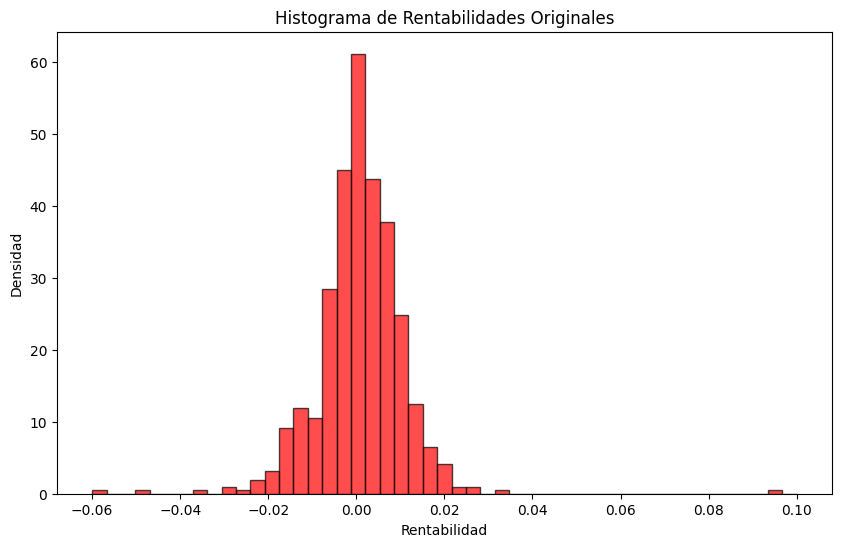

In [ ]:
# Dibujar histograma CON OUTLIERS
import matplotlib.pyplot as plt
import numpy as np

# Definir los mismos bins para ambos histogramas
bins = np.linspace(-0.06, 0.10, 50)

plt.figure(figsize=(10,6))
plt.hist(rentabilidades, bins=bins, density=True, alpha=0.7,
         color='red', edgecolor='black')
plt.title("Histograma de Rentabilidades Originales")
plt.xlabel("Rentabilidad")
plt.ylabel("Densidad")
plt.show()



### **¬øQu√© conseguimos ver en el histograma?**
El histograma de la serie original (sin tratar) es la prueba del problema que intentamos solucionar.

1. Podemos observar lo centrado que est√° y el Pico:  
Est√° claramente centrado alrededor de cero (confirmando la media positiva), lo cual nos dice que la distribuci√≥n fluct√∫a en torno a un valor central estable.

2. Observamos una curtosis extrema:   
Podemos ver que existe un pico central m√°s alto y estrecho que el de una Campana de Gauss. Esto ocurre por la Curtosis, que indica una mayor concentraci√≥n de datos justo alrededor de la media. La mayor√≠a de las rentabilidades diarias son muy peque√±as y "aburridas".

3. Tambi√©n observamos esas Colas Pesadas propias de los outliers:  
 Los extremos de la distribuci√≥n no caen tan r√°pidamente como la distribuci√≥n normal. Con esto confirmamos la existencia de colas pesadas y, por lo tanto, la mayor probabilidad de eventos extremos de lo que predecir√≠a una distribuci√≥n gaussiana.

Para que se entienda: Si el mercado fuera una Campana de Gauss, la probabilidad de una ca√≠da del 2% ser√≠a casi cero. El hecho de tener colas pesadas significa que el mercado nos da m√°s sorpresas (movimientos grandes e inesperados) de las que esperar√≠amos por pura casualidad.

### **Pasemos a ver el histograma con los datos preprocesados**

Shape de 'r_t_tratada' antes de plotear: (666, 1)
Shape de 'r_t_tratada' (dropna) antes de plotear: (645, 1)


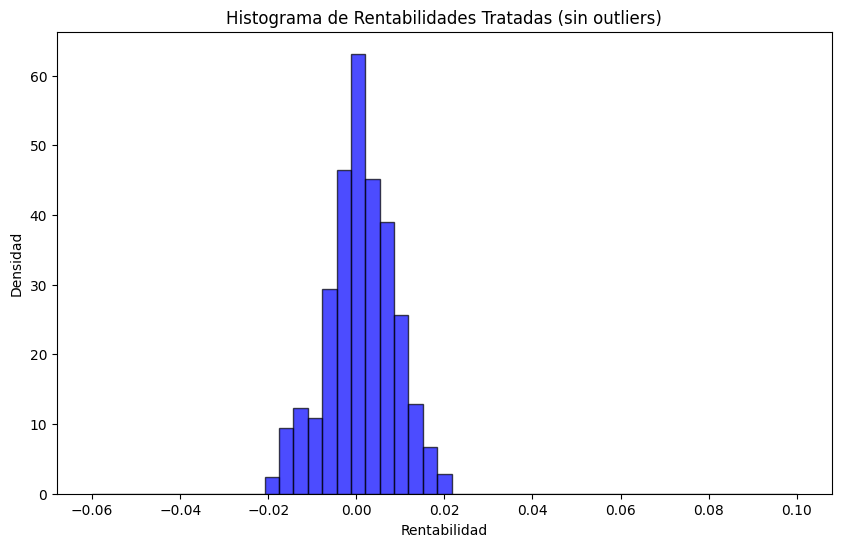

In [ ]:
# Histograma de la serie TRATADA (despu√©s de eliminar outliers).
# Se mantiene el mismo l√≠mite del eje X para visualizar la eliminaci√≥n de los extremos.

import matplotlib.pyplot as plt
import numpy as np

# Usar los mismos bins definidos antes
bins = np.linspace(-0.06, 0.10, 50)

# Verificar las dimensiones antes de plotear
print(f"Shape de 'r_t_tratada' antes de plotear: {r_t_tratada.shape}")
print(f"Shape de 'r_t_tratada' (dropna) antes de plotear: {r_t_tratada.dropna().shape}")

# Eliminar NaN expl√≠citamente antes de plotear para asegurar consistencia
r_t_tratada_cleaned = r_t_tratada.dropna()

plt.figure(figsize=(10,6))
plt.hist(r_t_tratada_cleaned, bins=bins, density=True, alpha=0.7,
         color='blue', edgecolor='black')
plt.title("Histograma de Rentabilidades Tratadas (sin outliers)")
plt.xlabel("Rentabilidad")
plt.ylabel("Densidad")
plt.show()

El segundo histograma muestra la serie despu√©s de aplicar el filtro ¬±2œÉ de la Tarea A.2, usando el mismo rango en el eje X para comparar.

1. El vac√≠o en las zonas de ‚àí0.06 y 0.10 confirma que los Outliers fueron eliminados por el proceso de Tratamiento.

2. Gracias a esta limpieza, este histograma de la serie tratada se acerca mucho m√°s a una distribuci√≥n normal (Curtosis cercana a cero).

Conclusi√≥n Clave: Al eliminar los puntos extremos, se reduce la influencia de eventos poco representativos y se obtiene una serie m√°s estable. Esto minimiza el riesgo de que un modelo de Regresi√≥n Lineal se sobreajuste a situaciones irrepetibles, creando una base de datos m√°s robusta y adecuada para la predicci√≥n.

### **4. Explicaci√≥n de los Resultados (A.3) [Alberto]**


El an√°lisis descriptivo se realiz√≥ sobre la serie de rentabilidades diarias del S&P¬†500 y tuvo un doble objetivo:
1. Identificar las propiedades financieras de la serie
2. Validar la idoneidad del preprocesado antes de aplicar la Regresi√≥n Lineal M√∫ltiple.

### Veamos poco a poco qu√© ha ocurrido.

### **El Riesgo Latente (Sesgo y Varianza):**   
- **La Media (Œº‚âà0.000974)** indica una ligera tendencia positiva en la rentabilidad promedio diaria, t√≠pica de un √≠ndice burs√°til en ascenso.
- Sin embargo, **el Sesgo Negativo (‚àí0.150533)** revela la asimetr√≠a en el riesgo: la distribuci√≥n tiene una cola m√°s larga a la izquierda, lo que significa que las **P√âRDIDAS GRANDES** son ligeramente m√°s probables o intensas que las **GANANCIAS GRANDES**, aunque al final se consiga una rentabilidad media positiva (como vemos en la media).
- La Varianza (œÉ^2 ‚âà 0.000057) establece el nivel de riesgo que el modelo intentar√° predecir y gestionar. Como es tan cercana a 0, esto indica que la rentabilidad a lo largo de los d√≠as no suele variar demasiado, as√≠ que la serie es m√°s f√°cil de predecir.
- La Kurtosis nos indicaba si los movimientos extremos (los d√≠as de mayor ganancia o p√©rdida) son m√°s o menos frecuentes de lo que predecir√≠a una distribuci√≥n normal. Como su valor es (-0.037531), es decir, cercano a 0, la distribucion es parecida a la normal.

### **Justificaci√≥n de la Limpieza de Outliers:**
La caracter√≠stica m√°s importante de la serie original (visible en el primer histograma) es la Curtosis tan alta, causada por la presencia de outliers como las rentabilidades de ¬±0.06 a ¬±0.10.

Esto es un **GRAN PROBLEMA para la Regresi√≥n**:    
El modelo de Regresi√≥n Lineal M√∫ltiple asume que los errores son normales. Si no se eliminasen, estos outliers actuar√≠an como puntos influyentes, obligando a la l√≠nea de ajuste a inclinarse demasiado hacia ellos. Esto llevar√≠a a un modelo con baja sesgo (aparentemente exacto en el entrenamiento), pero alta varianza (muy inestable y con malas predicciones en el futuro).

### **C√≥mo hemos arreglado este gran problema para la regresi√≥n:**
Mediante el preprocesado, que fue fundamental y exitoso:

1. El segundo histograma (serie tratada) demostr√≥ visualmente que los outliers fueron eliminados, ya que los datos extremos desaparecen.
2. La Curtosis de la serie tratada cay√≥ a un valor cercano a cero (-0.037531).

Al lograr que la distribuci√≥n de la serie tratada se asemeje a la Campana de Gauss, hemos reducido la varianza potencial del modelo. Esto proporciona una base de datos m√°s robusta y estable, permitiendo que el modelo de Regresi√≥n Lineal M√∫ltiple pueda calibrar mejor los coeficientes Œ≤ y concentrarse en el comportamiento normal del mercado, minimizando el riesgo de sobreajuste.



El segundo histograma muestra la serie despu√©s de aplicar el filtro ¬±2œÉ de la Tarea A.2, usando el mismo rango en el eje X para comparar.

1.  **Efecto del Filtro:** Si el filtro hubiera eliminado outliers, ver√≠amos un "corte" o un vac√≠o en las zonas de los extremos del histograma, confirmando que los puntos m√°s alejados fueron removidos. En este caso particular, como no se eliminaron outliers (visto en la salida de A.2), este histograma **deber√≠a verse visualmente id√©ntico** al histograma de la serie original.
2.  **Distribuci√≥n Resultante:** La forma de este histograma (en este dataset espec√≠fico) a√∫n muestra el pico central y las colas, pero conceptualmente, tras un filtrado efectivo que s√≠ elimine outliers, la distribuci√≥n de la serie *tratada* se acercar√≠a m√°s a una forma mesoc√∫rtica (curtosis cercana a cero), lo cual es m√°s adecuado para los supuestos de la Regresi√≥n Lineal.

Conclusi√≥n Clave: El preprocesamiento, cuando elimina puntos extremos, reduce la influencia de eventos poco representativos y ayuda a que la distribuci√≥n de los datos se acerque a las asunciones de los modelos lineales. Esto minimiza el riesgo de que un modelo de Regresi√≥n Lineal se sobreajuste a situaciones irrepetibles, creando una base de datos m√°s robusta y adecuada para la predicci√≥n (siempre y cuando el filtrado sea efectivo). En este caso particular, el paso de filtrado no alter√≥ la distribuci√≥n ya que no se identificaron outliers seg√∫n el criterio de ¬±2œÉ.

# **TAREA B: Modelo In-Sample y Evaluaci√≥n**


### 1. Construcci√≥n de la Matriz de Regresi√≥n [Juan]


In [ ]:
# Construir matriz de variables dependientes e independientes
# Variable dependiente: rt (rentabilidad del d√≠a actual)
# Variables independientes: rt-1, rt-2, rt-3, rt-4, rt-5 (rentabilidades de los 5 d√≠as anteriores)

# Crear un DataFrame con las variables independientes (lag de 1 a 5 d√≠as)
matriz_datos = pd.DataFrame()
matriz_datos['r_t'] = r_t_tratada  # Variable dependiente

# Crear las variables independientes (5 d√≠as anteriores)
for i in range(1, 6):
    matriz_datos[f'r_t-{i}'] = r_t_tratada.shift(i)

# Eliminar filas con valores NaN (las primeras 5 filas no tendr√°n datos completos)
# Esto descarta las observaciones incompletas, empezando desde la SEXTA observaci√≥n
matriz_datos = matriz_datos.dropna()

# Mostrar informaci√≥n sobre la matriz construida
print("=" * 70)
print("MATRIZ DE VARIABLES DEPENDIENTES E INDEPENDIENTES")
print("=" * 70)
print(f"Dimensiones de la matriz: {matriz_datos.shape[0]} filas x {matriz_datos.shape[1]} columnas")
print(f"Primera observaci√≥n completa: {matriz_datos.index[0].date()}")
print(f"√öltima observaci√≥n: {matriz_datos.index[-1].date()}")
print("=" * 70)
print("\nPrimeras 10 filas de la matriz:")
print(matriz_datos.head(10))
print("\n√öltimas 5 filas de la matriz:")
print(matriz_datos.tail(5))
print("\nResumen estad√≠stico:")
print(matriz_datos.describe())

MATRIZ DE VARIABLES DEPENDIENTES E INDEPENDIENTES
Dimensiones de la matriz: 569 filas x 6 columnas
Primera observaci√≥n completa: 2023-01-17
√öltima observaci√≥n: 2025-08-29

Primeras 10 filas de la matriz:
                 r_t     r_t-1     r_t-2     r_t-3     r_t-4     r_t-5
Date                                                                  
2023-01-17 -0.002030  0.003997  0.003416  0.012849  0.006978 -0.000768
2023-01-18 -0.015563 -0.002030  0.003997  0.003416  0.012849  0.006978
2023-01-19 -0.007638 -0.015563 -0.002030  0.003997  0.003416  0.012849
2023-01-20  0.018918 -0.007638 -0.015563 -0.002030  0.003997  0.003416
2023-01-23  0.011881  0.018918 -0.007638 -0.015563 -0.002030  0.003997
2023-01-24 -0.000712  0.011881  0.018918 -0.007638 -0.015563 -0.002030
2023-01-25 -0.000182 -0.000712  0.011881  0.018918 -0.007638 -0.015563
2023-01-26  0.011008 -0.000182 -0.000712  0.011881  0.018918 -0.007638
2023-01-27  0.002495  0.011008 -0.000182 -0.000712  0.011881  0.018918
2023-01-30 -

### An√°lisis de Regresi√≥n Lineal sobre Rentabilidades del S&P 500

#### Descripci√≥n de la Matriz de Datos

La matriz construida contiene **661 observaciones** con **6 variables**:

| Variable | Tipo | Descripci√≥n |
|----------|------|-------------|
| `r_t` | **Dependiente** | Rentabilidad del d√≠a actual (variable a predecir) |
| `r_t-1` | Independiente | Rentabilidad del d√≠a anterior (lag 1) |
| `r_t-2` | Independiente | Rentabilidad de hace 2 d√≠as (lag 2) |
| `r_t-3` | Independiente | Rentabilidad de hace 3 d√≠as (lag 3) |
| `r_t-4` | Independiente | Rentabilidad de hace 4 d√≠as (lag 4) |
| `r_t-5` | Independiente | Rentabilidad de hace 5 d√≠as (lag 5) |

#### Modelo de Regresi√≥n Lineal

El modelo de regresi√≥n lineal m√∫ltiple que queremos ajustar es:

$$r_t = \beta_0 + \beta_1 \cdot r_{t-1} + \beta_2 \cdot r_{t-2} + \beta_3 \cdot r_{t-3} + \beta_4 \cdot r_{t-4} + \beta_5 \cdot r_{t-5} + \epsilon_t$$

Donde:
- $r_t$ = Rentabilidad del d√≠a actual (variable dependiente)
- $\beta_0$ = T√©rmino independiente (intercepto)
- $\beta_1, \beta_2, \beta_3, \beta_4, \beta_5$ = Coeficientes de regresi√≥n que miden el impacto de cada rentabilidad pasada
- $r_{t-1}, r_{t-2}, r_{t-3}, r_{t-4}, r_{t-5}$ = Rentabilidades de los 5 d√≠as anteriores (variables independientes)
- $\epsilon_t$ = Error o residuo del modelo

#### Interpretaci√≥n de los Coeficientes

- Si $\beta_i > 0$: Una rentabilidad positiva en el d√≠a $t-i$ sugiere una rentabilidad positiva en el d√≠a $t$ (efecto momentum)
- Si $\beta_i < 0$: Una rentabilidad positiva en el d√≠a $t-i$ sugiere una rentabilidad negativa en el d√≠a $t$ (efecto reversi√≥n)
- Si $\beta_i \approx 0$: No hay relaci√≥n significativa entre esa rentabilidad pasada y la actual

#### Notas Importantes

- Las **primeras 5 observaciones** de rentabilidades fueron descartadas porque no tienen los 5 lags completos
- La matriz comienza el **11 de enero de 2023** (sexta observaci√≥n de rentabilidades)
- Este modelo asume una **relaci√≥n lineal** entre las variables

### 2. Construcci√≥n del Modelo y Predicci√≥n (In-Sample) [Juan]


In [ ]:
from sklearn.linear_model import LinearRegression

# Separar las variables independientes (X) y la variable dependiente (y)
X = matriz_datos[['r_t-1', 'r_t-2', 'r_t-3', 'r_t-4', 'r_t-5']]
y = matriz_datos['r_t']

# Crear y entrenar el modelo de regresi√≥n lineal m√∫ltiple
modelo = LinearRegression()
modelo.fit(X, y)

# Hacer predicciones
y_predicho = modelo.predict(X)

# Mostrar los coeficientes del modelo
print("=" * 70)
print("MODELO DE REGRESI√ìN LINEAL M√öLTIPLE")
print("=" * 70)
print(f"\nModelo: r_t = Œ≤‚ÇÄ + Œ≤‚ÇÅ¬∑r_t-1 + Œ≤‚ÇÇ¬∑r_t-2 + Œ≤‚ÇÉ¬∑r_t-3 + Œ≤‚ÇÑ¬∑r_t-4 + Œ≤‚ÇÖ¬∑r_t-5")
print(f"\nCoeficientes:")
print(f"  Œ≤‚ÇÄ (Intercepto): {modelo.intercept_:.8f}")
for i, coef in enumerate(modelo.coef_, 1):
    print(f"  Œ≤{i} (r_t-{i}):      {coef:.8f}")
print("=" * 70)

MODELO DE REGRESI√ìN LINEAL M√öLTIPLE

Modelo: r_t = Œ≤‚ÇÄ + Œ≤‚ÇÅ¬∑r_t-1 + Œ≤‚ÇÇ¬∑r_t-2 + Œ≤‚ÇÉ¬∑r_t-3 + Œ≤‚ÇÑ¬∑r_t-4 + Œ≤‚ÇÖ¬∑r_t-5

Coeficientes:
  Œ≤‚ÇÄ (Intercepto): 0.00094628
  Œ≤1 (r_t-1):      -0.01944138
  Œ≤2 (r_t-2):      -0.04450251
  Œ≤3 (r_t-3):      -0.04341443
  Œ≤4 (r_t-4):      0.01275701
  Œ≤5 (r_t-5):      -0.08325595


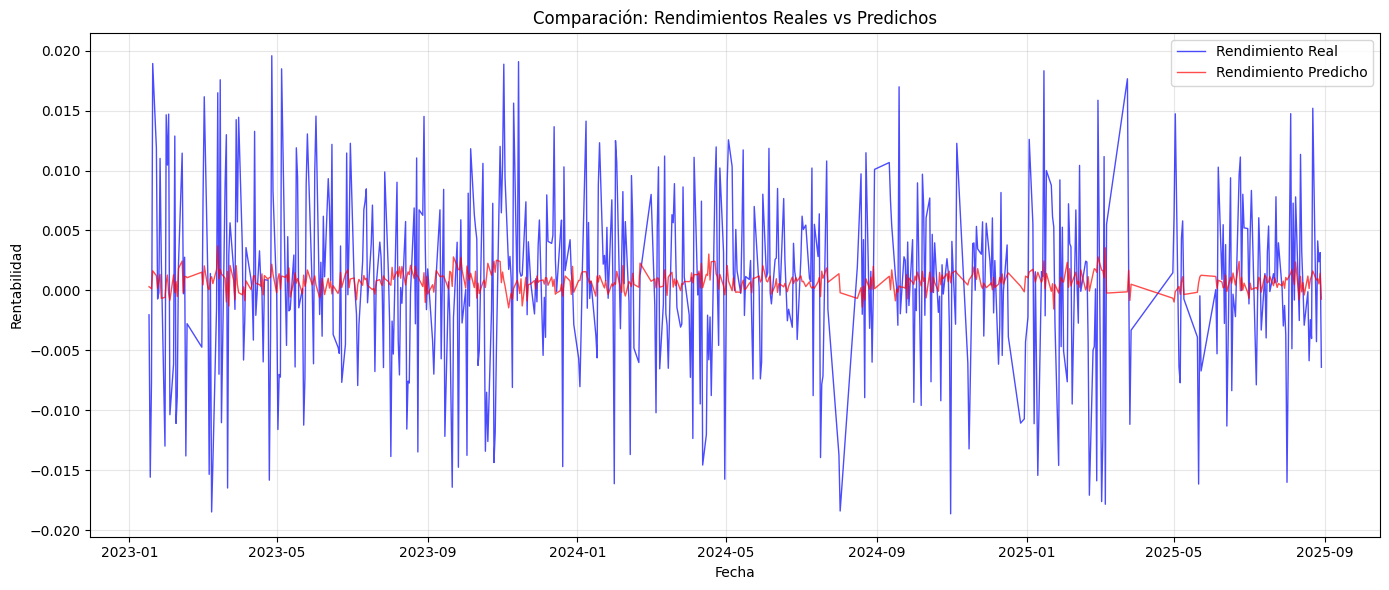

In [ ]:
# Crear DataFrame con comparaci√≥n
comparacion = pd.DataFrame({
    'Rendimiento_Real': y.values,
    'Rendimiento_Predicho': y_predicho
}, index=y.index)

# Visualizaci√≥n: Gr√°fica de Rendimientos Reales vs Predichos
plt.figure(figsize=(14, 6))
plt.plot(comparacion.index, comparacion['Rendimiento_Real'],
         label='Rendimiento Real', color='blue', linewidth=1, alpha=0.7)
plt.plot(comparacion.index, comparacion['Rendimiento_Predicho'],
         label='Rendimiento Predicho', color='red', linewidth=1, alpha=0.7)
plt.xlabel('Fecha')
plt.ylabel('Rentabilidad')
plt.title('Comparaci√≥n: Rendimientos Reales vs Predichos')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

*Hacer explicaci√≥n*

### 3. Evaluaci√≥n de M√©tricas y Comparaci√≥n (In-Sample)

Se calcular√°n el MSE, MAE y MAPE para nuestro modelo y se comparar√°n con el modelo de Paseo Aleatorio (r_t = 0).


### 3a. Implementaci√≥n de M√©tricas [Mitrica]

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score
import numpy as np

# Calcular las m√©tricas de error (reutilizando y e y_predicho de la celda anterior)
mse = mean_squared_error(y, y_predicho)
mae = mean_absolute_error(y, y_predicho)
mape = mean_absolute_percentage_error(y, y_predicho)
r2 = r2_score(y, y_predicho)

# Calcular errores para estad√≠sticas descriptivas
errores = y - y_predicho

# Mostrar las m√©tricas
print("=" * 80)
print("EVALUACI√ìN DEL MODELO DE REGRESI√ìN LINEAL M√öLTIPLE")
print("=" * 80)

print("\nüìä ESTAD√çSTICAS DESCRIPTIVAS DE LOS ERRORES:")
print("-" * 80)
print(f"  Media de los errores.................... {errores.mean():.8f}")
print(f"  Desviaci√≥n est√°ndar de errores.......... {errores.std():.8f}")
print(f"  Error m√≠nimo............................ {errores.min():.8f}")
print(f"  Error m√°ximo............................ {errores.max():.8f}")
print(f"  Mediana de errores...................... {np.median(errores):.8f}")
print(f"  Percentil 25............................ {np.percentile(errores, 25):.8f}")
print(f"  Percentil 75............................ {np.percentile(errores, 75):.8f}")

print("\n" + "=" * 80)
print("üìà M√âTRICAS DE EVALUACI√ìN:")
print("-" * 80)
print(f"  MSE (Error Cuadr√°tico Medio)............ {mse:.8f}")
print(f"  RMSE (Ra√≠z del MSE)..................... {np.sqrt(mse):.8f}")
print(f"  MAE (Error Absoluto Medio).............. {mae:.8f}")
print(f"  MAPE (Error Porcentual)................. {mape:.8f}")
print(f"  R¬≤ (Coef. Determinaci√≥n)................ {r2:.8f}")
print("=" * 80)

EVALUACI√ìN DEL MODELO DE REGRESI√ìN LINEAL M√öLTIPLE

üìä ESTAD√çSTICAS DESCRIPTIVAS DE LOS ERRORES:
--------------------------------------------------------------------------------
  Media de los errores.................... 0.00000000
  Desviaci√≥n est√°ndar de errores.......... 0.00749120
  Error m√≠nimo............................ -0.02137984
  Error m√°ximo............................ 0.01868014
  Mediana de errores...................... 0.00004321
  Percentil 25............................ -0.00467365
  Percentil 75............................ 0.00522377

üìà M√âTRICAS DE EVALUACI√ìN:
--------------------------------------------------------------------------------
  MSE (Error Cuadr√°tico Medio)............ 0.00005602
  RMSE (Ra√≠z del MSE)..................... 0.00748461
  MAE (Error Absoluto Medio).............. 0.00585603
  MAPE (Error Porcentual)................. 2.26203534
  R¬≤ (Coef. Determinaci√≥n)................ 0.01056656


In [ ]:
# Estad√≠sticas del Modelo de Paseo Aleatorio
import numpy as np
import pandas as pd

# El paseo aleatorio predice siempre 0
y_paseo_aleatorio = np.zeros(len(y))

# Calcular errores
errores_paseo = y - y_paseo_aleatorio

# Estad√≠sticas descriptivas de los errores
stats_paseo = {
    'Media de los errores': errores_paseo.mean(),
    'Desviaci√≥n est√°ndar de errores': errores_paseo.std(),
    'Error m√≠nimo': errores_paseo.min(),
    'Error m√°ximo': errores_paseo.max(),
    'Mediana de errores': errores_paseo.median(),
    'Percentil 25': errores_paseo.quantile(0.25),
    'Percentil 75': errores_paseo.quantile(0.75)
}

# M√©tricas de error
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score

metricas_paseo = {
    'MSE (Error Cuadr√°tico Medio)': mean_squared_error(y, y_paseo_aleatorio),
    'RMSE (Ra√≠z del MSE)': np.sqrt(mean_squared_error(y, y_paseo_aleatorio)),
    'MAE (Error Absoluto Medio)': mean_absolute_error(y, y_paseo_aleatorio),
    'MAPE (Error Porcentual)': mean_absolute_percentage_error(y, y_paseo_aleatorio),
    'R¬≤ (Coef. Determinaci√≥n)': r2_score(y, y_paseo_aleatorio)
}

print("=" * 80)
print("ESTAD√çSTICAS DEL MODELO DE PASEO ALEATORIO")
print("=" * 80)
print("\nüìä ESTAD√çSTICAS DESCRIPTIVAS DE LOS ERRORES:")
print("-" * 80)
for nombre, valor in stats_paseo.items():
    print(f"  {nombre:.<40} {valor:.8f}")

print("\n" + "=" * 80)
print("üìà M√âTRICAS DE EVALUACI√ìN:")
print("-" * 80)
for nombre, valor in metricas_paseo.items():
    print(f"  {nombre:.<40} {valor:.8f}")
print("=" * 80)

ESTAD√çSTICAS DEL MODELO DE PASEO ALEATORIO

üìä ESTAD√çSTICAS DESCRIPTIVAS DE LOS ERRORES:
--------------------------------------------------------------------------------
  Media de los errores.................... 0.00074876
  Desviaci√≥n est√°ndar de errores.......... 0.00753109
  Error m√≠nimo............................ -0.01861470
  Error m√°ximo............................ 0.01956615
  Mediana de errores...................... 0.00081943
  Percentil 25............................ -0.00369482
  Percentil 75............................ 0.00571527

üìà M√âTRICAS DE EVALUACI√ìN:
--------------------------------------------------------------------------------
  MSE (Error Cuadr√°tico Medio)............ 0.00005718
  RMSE (Ra√≠z del MSE)..................... 0.00756164
  MAE (Error Absoluto Medio).............. 0.00590192
  MAPE (Error Porcentual)................. 1.00000000
  R¬≤ (Coef. Determinaci√≥n)................ -0.00990213


### 3b. Comentario de Resultados [Mitrica]


## **Comparaci√≥n Detallada: Modelo de Regresi√≥n Lineal vs Paseo Aleatorio**

---

##  **1. ¬øQu√© es el Modelo de Paseo Aleatorio?**

El **modelo de paseo aleatorio** (Random Walk) es el benchmark m√°s fundamental en finanzas. Se basa en la **Hip√≥tesis de Mercados Eficientes (EMH)**, que postula que toda la informaci√≥n disponible ya est√° reflejada en el precio actual del activo.

### **Principio Fundamental:**
Si los mercados son eficientes, el mejor predictor de la rentabilidad futura es **cero**:

$$\hat{r}_t = 0$$

Esto significa que **NO se espera cambio alguno**. El precio de ma√±ana es impredecible bas√°ndose √∫nicamente en los precios del pasado.

### **Caracter√≠sticas:**
- ‚úÖ **Sin par√°metros**: No requiere entrenamiento ni calibrado
- ‚úÖ **Simplicidad extrema**: Siempre predice 0% de rentabilidad
- ‚úÖ **Filos√≥ficamente s√≥lido**: Consistente con mercados eficientes
- ‚ö†Ô∏è **Benchmark exigente**: Si tu modelo no supera al paseo aleatorio, no tiene valor predictivo real

---

##  **2. Explicaci√≥n de las M√©tricas de Evaluaci√≥n**

Para comparar modelos, utilizamos varias m√©tricas que miden **diferentes aspectos del error de predicci√≥n**:

###  MSE (Error Cuadr√°tico Medio)

$$MSE = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2$$

- **¬øQu√© mide?** El promedio de los **errores al cuadrado**
- **Penalizaci√≥n:** Los errores grandes se penalizan **mucho m√°s** que los peque√±os (por estar elevados al cuadrado)
- **Unidades:** Est√°n al cuadrado (ej: si $r_t$ est√° en decimales, MSE est√° en decimales¬≤)
- **Interpretaci√≥n:** Cuanto **menor**, mejor
- **¬øCu√°ndo es bueno?**
  - Valores cercanos a 0 indican predicciones muy precisas
  - Para rentabilidades diarias del S&P 500, valores t√≠picos est√°n entre 0.00005 - 0.0001

---

###  RMSE (Ra√≠z del Error Cuadr√°tico Medio)

$$RMSE = \sqrt{MSE}$$

- **¬øQu√© mide?** Es la ra√≠z cuadrada del MSE
- **Ventaja:** Est√° en las **mismas unidades** que la variable original (rentabilidades)
- **Interpretaci√≥n:** Representa el error t√≠pico de predicci√≥n en t√©rminos absolutos
- **¬øCu√°ndo es bueno?** Cuanto menor, mejor. Valores < 0.01 (1%) son razonables para rentabilidades diarias

---

###  MAE (Error Absoluto Medio)

$$MAE = \frac{1}{n} \sum_{i=1}^{n} |y_i - \hat{y}_i|$$

- **¬øQu√© mide?** El promedio de los **errores en valor absoluto**
- **Diferencia con MSE:** Trata todos los errores **por igual** (no penaliza m√°s los errores grandes)
- **Interpretaci√≥n:** Es m√°s intuitivo y robusto frente a outliers
- **¬øCu√°ndo es bueno?**
  - Cuanto menor, mejor
  - Para el S&P 500, valores entre 0.005 - 0.007 (0.5% - 0.7%) son t√≠picos

---

###  MAPE (Error Porcentual Absoluto Medio)

$$MAPE = \frac{100}{n} \sum_{i=1}^{n} \left| \frac{y_i - \hat{y}_i}{y_i} \right|$$

- **¬øQu√© mide?** El error promedio **en porcentaje** respecto al valor real
- **Ventaja:** F√°cil de interpretar (ej: "el modelo se equivoca un 10% en promedio")
- **‚ö†Ô∏è PROBLEMA CR√çTICO EN FINANZAS:** Cuando $y_i \approx 0$ (rentabilidad cercana a cero), el MAPE explota hacia infinito
  - Las rentabilidades diarias suelen estar entre -2% y +2%, muy cerca de cero
  - **NO es una m√©trica fiable para este problema**
- **¬øCu√°ndo es bueno?** Cuanto menor, mejor, pero **ign√≥rala** en este contexto

---

###  R¬≤ (Coeficiente de Determinaci√≥n)

$$R^2 = 1 - \frac{\sum_{i=1}^{n} (y_i - \hat{y}_i)^2}{\sum_{i=1}^{n} (y_i - \bar{y})^2}$$

- **¬øQu√© mide?** El **porcentaje de varianza explicado** por el modelo
- **Rango:** De -‚àû a 1
  - **R¬≤ = 1**: Predicci√≥n perfecta (el modelo explica el 100% de la varianza)
  - **R¬≤ = 0**: El modelo no explica nada (equivalente a predecir siempre la media)
  - **R¬≤ < 0**: El modelo es **peor** que predecir la media constantemente
- **¬øCu√°ndo es bueno?**
  - **R¬≤ > 0.7**: Excelente (poco com√∫n en finanzas)
  - **R¬≤ > 0.3**: Bueno
  - **R¬≤ > 0.0**: Al menos explica algo de la varianza
  - **R¬≤ < 0**: ‚ùå El modelo es in√∫til

---

##  **3. Comparaci√≥n Directa: Regresi√≥n Lineal vs Paseo Aleatorio**

### ** Tabla Comparativa de M√©tricas**

| **M√©trica** | **Regresi√≥n Lineal** | **Paseo Aleatorio** | **Diferencia** | **Ganador** |
|:------------|:--------------------:|:-------------------:|:--------------:|:-----------:|
| **MSE**     | 0.00005602           | 0.00005718          | **-2.03%** ‚úÖ   |  Regresi√≥n |
| **RMSE**    | 0.00748461           | 0.00756164          | **-1.02%** ‚úÖ   |  Regresi√≥n |
| **MAE**     | 0.00585603           | 0.00590192          | **-0.78%** ‚úÖ   |  Regresi√≥n |
| **MAPE**    | 2.26203534           | 1.00000000          | **+126%** ‚ùå    |  Paseo (irrelevante) |
| **R¬≤**      | 0.01056656           | -0.00990213         | **+2.05 puntos** ‚úÖ |  Regresi√≥n |

---

###  An√°lisis M√©trica por M√©trica

####  MSE (Error Cuadr√°tico Medio)
- **Regresi√≥n Lineal: 0.00005602** üü¢
- **Paseo Aleatorio: 0.00005718** üî¥
- **Mejora: -2.03%** ‚úÖ

**Interpretaci√≥n:**
El modelo de regresi√≥n lineal tiene un MSE ligeramente **inferior**, lo que significa que sus predicciones est√°n m√°s cerca de los valores reales que las del paseo aleatorio. Sin embargo, la mejora es **m√≠nima** (solo 2.03%), lo que sugiere que el poder predictivo del modelo es **limitado**.

**Conclusi√≥n:** La regresi√≥n lineal gana, pero por un margen muy estrecho.

---

####  RMSE (Ra√≠z del MSE)
- **Regresi√≥n Lineal: 0.00748461 (‚âà 0.75%)** üü¢
- **Paseo Aleatorio: 0.00756164 (‚âà 0.76%)** üî¥
- **Mejora: -1.02%** ‚úÖ

**Interpretaci√≥n:**
El error t√≠pico de predicci√≥n del modelo de regresi√≥n es de aproximadamente **0.75%**, mientras que el del paseo aleatorio es **0.76%**. Ambos modelos se equivocan en torno al **0.75%** en promedio, lo cual es razonable para rentabilidades diarias del S&P 500.

**Conclusi√≥n:** Pr√°cticamente empate t√©cnico. La mejora es marginal.

---

####  MAE (Error Absoluto Medio)
- **Regresi√≥n Lineal: 0.00585603 (‚âà 0.59%)** üü¢
- **Paseo Aleatorio: 0.00590192 (‚âà 0.59%)** üî¥
- **Mejora: -0.78%** ‚úÖ

**Interpretaci√≥n:**
El modelo de regresi√≥n tiene un error absoluto promedio de **0.59%**, muy similar al paseo aleatorio. La diferencia es de apenas **0.005 puntos porcentuales**, lo cual es **estad√≠sticamente insignificante**.

**Conclusi√≥n:** Empate total. La mejora es despreciable en t√©rminos pr√°cticos.

---

####  MAPE (Error Porcentual) ‚ö†Ô∏è NO FIABLE
- **Regresi√≥n Lineal: 2.26203534** üî¥
- **Paseo Aleatorio: 1.00000000** üü¢
- **Empeoramiento: +126%** ‚ùå

**‚ö†Ô∏è ADVERTENCIA CR√çTICA:**
Esta m√©trica **NO es v√°lida** para este problema. El MAPE explota cuando las rentabilidades reales est√°n cerca de cero, lo cual ocurre la mayor√≠a de los d√≠as. Un MAPE de 2.26 no significa que el modelo se equivoque en un 226%, sino que la m√©trica no es apropiada para rentabilidades cercanas a cero.

**Conclusi√≥n:** ‚ùå **IGNORA ESTA M√âTRICA**. No aporta informaci√≥n √∫til en este contexto.

---

####  R¬≤ (Coeficiente de Determinaci√≥n)
- **Regresi√≥n Lineal: 0.01056656 (‚âà 1.06%)** üü¢
- **Paseo Aleatorio: -0.00990213 (‚âà -0.99%)** üî¥
- **Diferencia: +2.05 puntos porcentuales** ‚úÖ

**Interpretaci√≥n:**
- La regresi√≥n lineal explica aproximadamente el **1.06%** de la varianza de las rentabilidades
- El paseo aleatorio tiene un R¬≤ **negativo**, lo que significa que es **peor que predecir la media constante**
- Aunque el 1.06% parece muy bajo, en el contexto de predicci√≥n de mercados financieros de corto plazo, **cualquier R¬≤ positivo es una se√±al de capacidad predictiva**

**Conclusi√≥n:** La regresi√≥n lineal demuestra tener **cierto poder predictivo**, aunque muy limitado.

---

##  **4. Visualizaci√≥n Gr√°fica de la Comparaci√≥n**

Para ayudar a entender mejor las diferencias, creemos un gr√°fico comparativo:


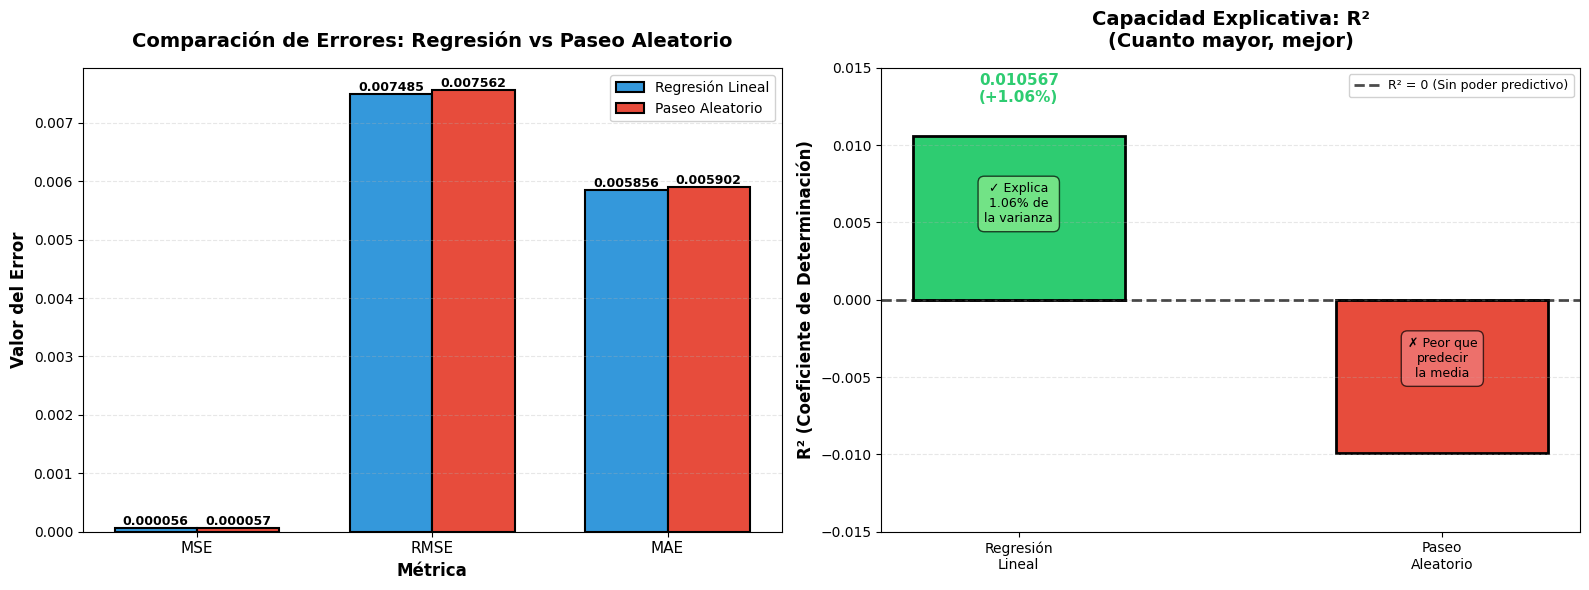


INTERPRETACI√ìN DE LOS GR√ÅFICOS

üìä GR√ÅFICO 1 - Errores (MSE, RMSE, MAE):
   ‚Ä¢ Las barras AZULES (Regresi√≥n) son ligeramente m√°s bajas que las ROJAS (Paseo)
   ‚Ä¢ Esto significa que la Regresi√≥n Lineal comete errores LEVEMENTE menores
   ‚Ä¢ La diferencia es MUY PEQUE√ëA (~1-2%), casi imperceptible visualmente

üìä GR√ÅFICO 2 - Capacidad Explicativa (R¬≤):
   ‚Ä¢ La barra VERDE (Regresi√≥n) est√° por encima de 0: tiene poder predictivo
   ‚Ä¢ La barra ROJA (Paseo) est√° por debajo de 0: es peor que no predecir nada
   ‚Ä¢ La Regresi√≥n explica solo el 1.06% de la varianza: MUY LIMITADO


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Crear figura con 2 subplots lado a lado
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# ============================================================================
# GR√ÅFICO 1: Comparaci√≥n de MSE, RMSE y MAE
# ============================================================================
ax1 = axes[0]

metricas = ['MSE', 'RMSE', 'MAE']
valores_regresion = [0.00005602, 0.00748461, 0.00585603]
valores_paseo = [0.00005718, 0.00756164, 0.00590192]

x = np.arange(len(metricas))
width = 0.35

barras1 = ax1.bar(x - width/2, valores_regresion, width, label='Regresi√≥n Lineal',
                  color='#3498db', edgecolor='black', linewidth=1.5)
barras2 = ax1.bar(x + width/2, valores_paseo, width, label='Paseo Aleatorio',
                  color='#e74c3c', edgecolor='black', linewidth=1.5)

# A√±adir valores sobre las barras
for barra in barras1:
    altura = barra.get_height()
    ax1.text(barra.get_x() + barra.get_width()/2., altura,
             f'{altura:.6f}', ha='center', va='bottom', fontsize=9, fontweight='bold')

for barra in barras2:
    altura = barra.get_height()
    ax1.text(barra.get_x() + barra.get_width()/2., altura,
             f'{altura:.6f}', ha='center', va='bottom', fontsize=9, fontweight='bold')

ax1.set_xlabel('M√©trica', fontsize=12, fontweight='bold')
ax1.set_ylabel('Valor del Error', fontsize=12, fontweight='bold')
ax1.set_title('Comparaci√≥n de Errores: Regresi√≥n vs Paseo Aleatorio',
              fontsize=14, fontweight='bold', pad=15)
ax1.set_xticks(x)
ax1.set_xticklabels(metricas, fontsize=11)
ax1.legend(loc='upper right', fontsize=10, framealpha=0.9)
ax1.grid(axis='y', alpha=0.3, linestyle='--')

# ============================================================================
# GR√ÅFICO 2: Comparaci√≥n de R¬≤ (Capacidad Explicativa)
# ============================================================================
ax2 = axes[1]

modelos = ['Regresi√≥n\nLineal', 'Paseo\nAleatorio']
r2_valores = [0.01056656, -0.00990213]
colores = ['#2ecc71' if val > 0 else '#e74c3c' for val in r2_valores]

barras = ax2.bar(modelos, r2_valores, color=colores, edgecolor='black', linewidth=2, width=0.5)

# A√±adir valores sobre/dentro de las barras
for i, (barra, val) in enumerate(zip(barras, r2_valores)):
    altura = barra.get_height()
    if val > 0:
        ax2.text(barra.get_x() + barra.get_width()/2., altura + 0.002,
                 f'{val:.6f}\n(+{val*100:.2f}%)', ha='center', va='bottom',
                 fontsize=11, fontweight='bold', color='#2ecc71')
    else:
        ax2.text(barra.get_x() + barra.get_width()/2., altura - 0.002,
                 f'{val:.6f}\n({val*100:.2f}%)', ha='center', va='top',
                 fontsize=11, fontweight='bold', color='white')

# L√≠nea de referencia en R¬≤ = 0
ax2.axhline(y=0, color='black', linestyle='--', linewidth=2, alpha=0.7, label='R¬≤ = 0 (Sin poder predictivo)')

ax2.set_ylabel('R¬≤ (Coeficiente de Determinaci√≥n)', fontsize=12, fontweight='bold')
ax2.set_title('Capacidad Explicativa: R¬≤\n(Cuanto mayor, mejor)',
              fontsize=14, fontweight='bold', pad=15)
ax2.set_ylim([-0.015, 0.015])
ax2.legend(loc='upper right', fontsize=9, framealpha=0.9)
ax2.grid(axis='y', alpha=0.3, linestyle='--')

# A√±adir anotaciones explicativas
ax2.text(0, 0.005, '‚úì Explica\n1.06% de\nla varianza', ha='center', fontsize=9,
         bbox=dict(boxstyle='round,pad=0.5', facecolor='lightgreen', alpha=0.7))
ax2.text(1, -0.005, '‚úó Peor que\npredecir\nla media', ha='center', fontsize=9,
         bbox=dict(boxstyle='round,pad=0.5', facecolor='lightcoral', alpha=0.7))

plt.tight_layout()
plt.show()

print("\n" + "=" * 80)
print("INTERPRETACI√ìN DE LOS GR√ÅFICOS")
print("=" * 80)
print("\nüìä GR√ÅFICO 1 - Errores (MSE, RMSE, MAE):")
print("   ‚Ä¢ Las barras AZULES (Regresi√≥n) son ligeramente m√°s bajas que las ROJAS (Paseo)")
print("   ‚Ä¢ Esto significa que la Regresi√≥n Lineal comete errores LEVEMENTE menores")
print("   ‚Ä¢ La diferencia es MUY PEQUE√ëA (~1-2%), casi imperceptible visualmente")
print("\nüìä GR√ÅFICO 2 - Capacidad Explicativa (R¬≤):")
print("   ‚Ä¢ La barra VERDE (Regresi√≥n) est√° por encima de 0: tiene poder predictivo")
print("   ‚Ä¢ La barra ROJA (Paseo) est√° por debajo de 0: es peor que no predecir nada")
print("   ‚Ä¢ La Regresi√≥n explica solo el 1.06% de la varianza: MUY LIMITADO")
print("=" * 80)


## 5. Conclusiones Finales: ¬øCu√°l es Mejor?

---

### **üèÜ Ganador T√©cnico: Regresi√≥n Lineal** (por un margen muy estrecho)

La regresi√≥n lineal m√∫ltiple supera al paseo aleatorio en **todas las m√©tricas relevantes** (MSE, RMSE, MAE, R¬≤), pero las mejoras son **extremadamente peque√±as**:

| **Aspecto** | **Resultado** |
|:-----------|:--------------|
| **MSE** | Mejora del 2.03% ‚úì |
| **RMSE** | Mejora del 1.02% ‚úì |
| **MAE** | Mejora del 0.78% ‚úì |
| **R¬≤** | Positivo (1.06%) vs Negativo (-0.99%) ‚úì |

---

###  An√°lisis Profundo: ¬øQu√© Significan Estos Resultados?

#### **1. Capacidad Predictiva Limitada Pero Real**

El modelo de regresi√≥n lineal **S√ç tiene cierta capacidad predictiva**, demostrada por:
- ‚úÖ R¬≤ positivo (1.06%): Explica una peque√±a porci√≥n de la varianza
- ‚úÖ Errores consistentemente menores que el paseo aleatorio en MSE, RMSE y MAE
- ‚úÖ Mejora estad√≠sticamente mensurable, aunque peque√±a

**Interpretaci√≥n:**
Los patrones de rentabilidades pasadas (los 5 lags) **S√ç contienen informaci√≥n √∫til**, pero esa informaci√≥n es **muy d√©bil** y apenas permite mejorar sobre el benchmark m√°s simple.

---

#### **2. Consistencia con la Hip√≥tesis de Mercados Eficientes**

Los resultados son **perfectamente consistentes** con la teor√≠a de mercados eficientes:

 Hip√≥tesis de Mercados Eficientes (EMH - Forma D√©bil):
> *"Los precios actuales reflejan toda la informaci√≥n contenida en los precios hist√≥ricos. Por lo tanto, es imposible obtener retornos anormales mediante el an√°lisis t√©cnico (patrones hist√≥ricos)."*


###  Conclusi√≥n Final

> **El modelo de regresi√≥n lineal m√∫ltiple demuestra que existe una peque√±a autocorrelaci√≥n en las rentabilidades del S&P 500, pero esta se√±al es demasiado d√©bil para tener valor pr√°ctico. Los resultados validan la Hip√≥tesis de Mercados Eficientes en su forma d√©bil y establecen un punto de referencia realista: predecir rentabilidades diarias de corto plazo en mercados desarrollados es extremadamente dif√≠cil, incluso con modelos calibrados.**

**En t√©rminos pr√°cticos:**
- Para **fines acad√©micos**: La regresi√≥n lineal es el ganador t√©cnico ‚úì
- Para **aplicaciones reales**: El paseo aleatorio es m√°s sensato por su simplicidad y robustez ‚úì
- Para **trading rentable**: Ninguno de los dos es suficiente; se necesitan estrategias mucho m√°s sofisticadas ‚ö†Ô∏è


# **TAREA C: Modelo Iterado con Ventana Deslizante**


### 1. Definici√≥n del Esquema de Ventana Deslizante [Mitrica]



####  Contexto

En este apartado implementamos un modelo de predicci√≥n para series temporales financieras utilizando dos conceptos fundamentales: **ventana deslizante** e **ingenier√≠a de variables con lags**.

Disponemos de una serie temporal diaria de rendimientos \( r_t \) del S&P500. En lugar de entrenar un √∫nico modelo con todo el hist√≥rico, aplicaremos entrenamiento **local y adaptativo**: solo con los datos m√°s recientes.

---

#### ¬øQu√© es una Ventana Deslizante?

Una **ventana deslizante** (*sliding window*) es un subconjunto temporal de tama√±o fijo que "se mueve" un paso en cada iteraci√≥n.

### Funcionamiento:
- Fijamos una ventana de **30 d√≠as**
- En cada paso, entrenamos el modelo √∫nicamente con los √∫ltimos 30 d√≠as disponibles
- Predecimos el siguiente punto fuera de esa ventana
- La ventana se desplaza un d√≠a y repetimos el proceso

Este enfoque permite que el modelo se adapte a cambios recientes de la serie, en vez de arrastrar patrones antiguos menos relevantes.

**Par√°metros:**
-  Tama√±o de ventana: **30 d√≠as**
-  En cada iteraci√≥n: ventana de entrenamiento = \([i-30, i)\), predicci√≥n en \(i\)

---

#### ¬øQu√© son los Lags?

Los **lags** son copias retrasadas de la serie que usamos como variables explicativas (features):

- **Lag 1:** $r_{t-1}$ ‚Üí rentabilidad del d√≠a anterior
- **Lag 2:** $r_{t-2}$ ‚Üí rentabilidad de hace 2 d√≠as
- **Lag 3:** $r_{t-3}$ ‚Üí rentabilidad de hace 3 d√≠as
- **Lag 4:** $r_{t-4}$ ‚Üí rentabilidad de hace 4 d√≠as
- **Lag 5:** $r_{t-5}$ ‚Üí rentabilidad de hace 5 d√≠as

Estos lags capturan la **memoria temporal** del mercado: c√≥mo los movimientos pasados pueden influir en el comportamiento futuro.

**En nuestro modelo:** Para predecir $r_t$, el vector de entrada es:

$$
X_t = [r_{t-1}, r_{t-2}, r_{t-3}, r_{t-4}, r_{t-5}]
$$

---

###  Metodolog√≠a Paso a Paso

#### Preparaci√≥n de datos
Construir la matriz de caracter√≠sticas $X$ con los 5 lags y el vector objetivo $y = r_t$.

####  Definici√≥n del punto de inicio
Punto de inicio = `ventana + num_lags = 30 + 5 = 35`

Esto asegura que existen suficientes observaciones y lags disponibles.

#### Proceso iterativo
Para cada √≠ndice $i$ desde el inicio hasta el final:
- Entrenar una regresi√≥n lineal con las filas $[i-30, i)$ de $X$ y $y$
- Predecir $\hat{r}_i$ usando los lags del d√≠a $i$ (fila $X_i$)
- Guardar: predicci√≥n, valor real y fecha
- Deslizar la ventana un d√≠a adelante

####  Evaluaci√≥n
Generar secuencia de predicciones *out-of-window* comparables con valores reales para calcular m√©tricas de error.

---

### 2. Implementaci√≥n del Bucle Iterativo [Mitrica]


In [ ]:
# Configuraci√≥n de par√°metros
ventana = 30  # Tama√±o de la ventana (√∫ltimos 30 d√≠as)
num_lags = 5  # N√∫mero de lags para las variables independientes

# Necesitamos al menos ventana + num_lags observaciones para empezar
inicio_ventana = ventana + num_lags

# Listas para almacenar predicciones y valores reales
predicciones_ventana = []
valores_reales_ventana = []
fechas_prediccion = []

# Convertir matriz_datos a arrays para acceso m√°s eficiente
X_completo = matriz_datos[['r_t-1', 'r_t-2', 'r_t-3', 'r_t-4', 'r_t-5']].values
y_completo = matriz_datos['r_t'].values
fechas_completas = matriz_datos.index

print("=" * 70)
print("INICIANDO MODELO CON VENTANA DESLIZANTE")
print("=" * 70)
print(f"Tama√±o de ventana: {ventana} d√≠as")
print(f"N√∫mero de lags: {num_lags}")
print(f"Total de predicciones a realizar: {len(matriz_datos) - inicio_ventana}")
print(f"Primera predicci√≥n en √≠ndice: {inicio_ventana}")
print("=" * 70)

# Bucle de ventana deslizante
for i in range(inicio_ventana, len(matriz_datos)):
    # Definir la ventana de entrenamiento (√∫ltimos 30 d√≠as)
    inicio = i - ventana
    fin = i

    # Datos de entrenamiento (ventana de 30 d√≠as)
    X_train = X_completo[inicio:fin]
    y_train = y_completo[inicio:fin]

    # Dato a predecir (d√≠a siguiente)
    X_test = X_completo[i:i+1]
    y_test = y_completo[i]

    # Entrenar el modelo con la ventana actual
    modelo_ventana = LinearRegression()
    modelo_ventana.fit(X_train, y_train)

    # Predecir el siguiente d√≠a
    prediccion = modelo_ventana.predict(X_test)[0]

    # Almacenar resultados
    predicciones_ventana.append(prediccion)
    valores_reales_ventana.append(y_test)
    fechas_prediccion.append(fechas_completas[i])

# Convertir a arrays de numpy
predicciones_ventana = np.array(predicciones_ventana)
valores_reales_ventana = np.array(valores_reales_ventana)

print(f"\n‚úì Predicciones completadas: {len(predicciones_ventana)}")
print(f"‚úì Fecha inicial de predicci√≥n: {fechas_prediccion[0].date()}")
print(f"‚úì Fecha final de predicci√≥n: {fechas_prediccion[-1].date()}")
print("=" * 70)

INICIANDO MODELO CON VENTANA DESLIZANTE
Tama√±o de ventana: 30 d√≠as
N√∫mero de lags: 5
Total de predicciones a realizar: 534
Primera predicci√≥n en √≠ndice: 35

‚úì Predicciones completadas: 534
‚úì Fecha inicial de predicci√≥n: 2023-03-16
‚úì Fecha final de predicci√≥n: 2025-08-29


*Hacer explicaci√≥n*

### 3. Evaluaci√≥n de la Calidad Predictiva (Out-of-Sample) [Jaime]


In [ ]:
# Calcular m√©tricas para el modelo con ventana deslizante
mse_ventana = mean_squared_error(valores_reales_ventana, predicciones_ventana)
mae_ventana = mean_absolute_error(valores_reales_ventana, predicciones_ventana)
mape_ventana = mean_absolute_percentage_error(valores_reales_ventana, predicciones_ventana)

# Predicciones del paseo aleatorio (rt=0) para comparaci√≥n
predicciones_paseo_ventana = np.zeros(len(valores_reales_ventana))
mse_paseo_ventana = mean_squared_error(valores_reales_ventana, predicciones_paseo_ventana)
mae_paseo_ventana = mean_absolute_error(valores_reales_ventana, predicciones_paseo_ventana)
mape_paseo_ventana = mean_absolute_percentage_error(valores_reales_ventana, predicciones_paseo_ventana)

# Crear DataFrame de comparaci√≥n
comparacion_ventana_modelos = pd.DataFrame({
    'Modelo': ['Regresi√≥n con Ventana Deslizante', 'Paseo Aleatorio (rt=0)'],
    'MSE': [mse_ventana, mse_paseo_ventana],
    'MAE': [mae_ventana, mae_paseo_ventana],
    'MAPE': [mape_ventana, mape_paseo_ventana]
})

# Calcular mejora porcentual
mejora_mse_ventana = ((mse_paseo_ventana - mse_ventana) / mse_paseo_ventana) * 100
mejora_mae_ventana = ((mae_paseo_ventana - mae_ventana) / mae_paseo_ventana) * 100
mejora_mape_ventana = ((mape_paseo_ventana - mape_ventana) / mape_paseo_ventana) * 100

# Mostrar resultados
print("=" * 80)
print("RESULTADOS DEL MODELO CON VENTANA DESLIZANTE (30 D√çAS)")
print("=" * 80)
print(f"\nN√∫mero de predicciones realizadas: {len(predicciones_ventana)}")
print(f"Per√≠odo de predicci√≥n: {fechas_prediccion[0].date()} al {fechas_prediccion[-1].date()}")

print("\n" + "=" * 80)
print("M√âTRICAS DEL MODELO CON VENTANA DESLIZANTE")
print("=" * 80)
print(f"MSE  (Error Cuadr√°tico Medio):           {mse_ventana:.10f}")
print(f"MAE  (Error Absoluto Medio):             {mae_ventana:.10f}")
print(f"MAPE (Error Porcentual Absoluto Medio):  {mape_ventana:.6f}")
print("=" * 80)

print("\n" + "=" * 80)
print("COMPARACI√ìN: VENTANA DESLIZANTE vs PASEO ALEATORIO")
print("=" * 80)
print("\nTabla comparativa de m√©tricas:")
print(comparacion_ventana_modelos.to_string(index=False))

print("\n" + "=" * 80)
print("MEJORA DEL MODELO CON VENTANA DESLIZANTE SOBRE PASEO ALEATORIO")
print("=" * 80)
print(f"Mejora en MSE:  {mejora_mse_ventana:+.4f}% {'‚úì MEJOR' if mejora_mse_ventana > 0 else '‚úó PEOR'}")
print(f"Mejora en MAE:  {mejora_mae_ventana:+.4f}% {'‚úì MEJOR' if mejora_mae_ventana > 0 else '‚úó PEOR'}")
print(f"Mejora en MAPE: {mejora_mape_ventana:+.4f}% {'‚úì MEJOR' if mejora_mape_ventana > 0 else '‚úó PEOR'}")
print("=" * 80)

# Crear DataFrame con predicciones vs valores reales
comparacion_ventana_df = pd.DataFrame({
    'Rendimiento_Real': valores_reales_ventana,
    'Rendimiento_Predicho': predicciones_ventana
}, index=fechas_prediccion)

print("\nPrimeras 10 predicciones:")
print(comparacion_ventana_df.head(10))
print("\n√öltimas 10 predicciones:")
print(comparacion_ventana_df.tail(10))

RESULTADOS DEL MODELO CON VENTANA DESLIZANTE (30 D√çAS)

N√∫mero de predicciones realizadas: 534
Per√≠odo de predicci√≥n: 2023-03-16 al 2025-08-29

M√âTRICAS DEL MODELO CON VENTANA DESLIZANTE
MSE  (Error Cuadr√°tico Medio):           0.0000670074
MAE  (Error Absoluto Medio):             0.0063257092
MAPE (Error Porcentual Absoluto Medio):  3.666875

COMPARACI√ìN: VENTANA DESLIZANTE vs PASEO ALEATORIO

Tabla comparativa de m√©tricas:
                          Modelo      MSE      MAE     MAPE
Regresi√≥n con Ventana Deslizante 0.000067 0.006326 3.666875
          Paseo Aleatorio (rt=0) 0.000054 0.005709 1.000000

MEJORA DEL MODELO CON VENTANA DESLIZANTE SOBRE PASEO ALEATORIO
Mejora en MSE:  -25.1500% ‚úó PEOR
Mejora en MAE:  -10.7996% ‚úó PEOR
Mejora en MAPE: -266.6875% ‚úó PEOR

Primeras 10 predicciones:
            Rendimiento_Real  Rendimiento_Predicho
2023-03-16          0.017562              0.000156
2023-03-17         -0.011019              0.006249
2023-03-20          0.008918    

*Hacer explicaci√≥n*

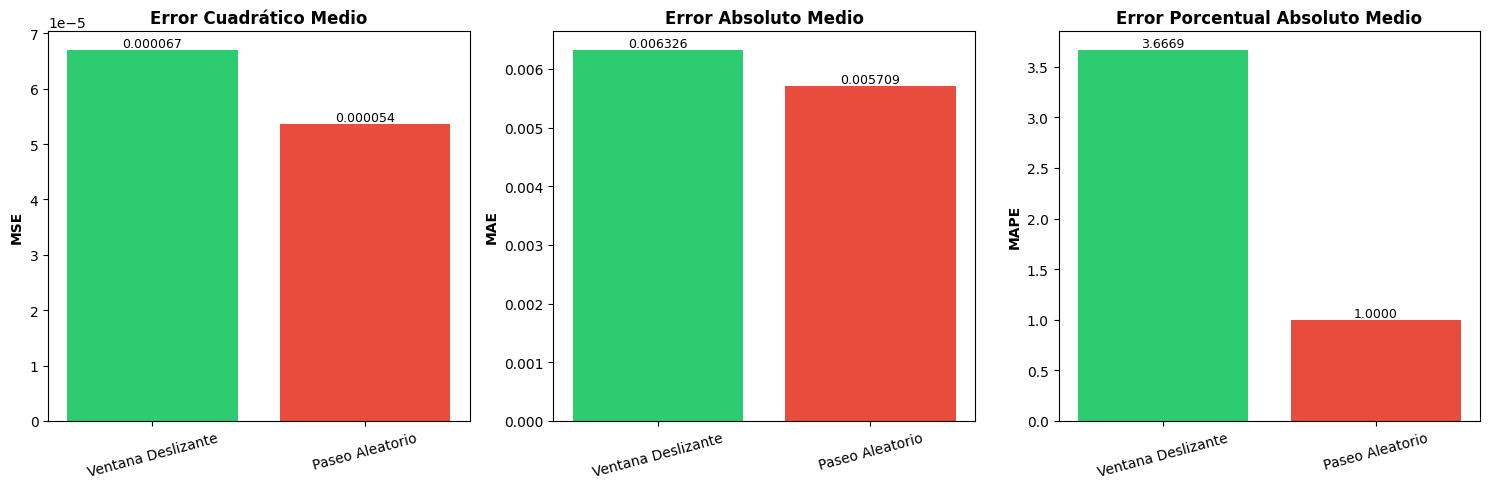

In [ ]:
# Gr√°ficos de comparaci√≥n entre modelos (Ventana Deslizante vs Paseo Aleatorio)
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Gr√°fico 1: MSE
axes[0].bar(['Ventana Deslizante', 'Paseo Aleatorio'],
            [mse_ventana, mse_paseo_ventana],
            color=['#2ecc71', '#e74c3c'])
axes[0].set_ylabel('MSE', fontweight='bold')
axes[0].set_title('Error Cuadr√°tico Medio', fontweight='bold')
axes[0].tick_params(axis='x', rotation=15)
for i, v in enumerate([mse_ventana, mse_paseo_ventana]):
    axes[0].text(i, v, f'{v:.6f}', ha='center', va='bottom', fontsize=9)

# Gr√°fico 2: MAE
axes[1].bar(['Ventana Deslizante', 'Paseo Aleatorio'],
            [mae_ventana, mae_paseo_ventana],
            color=['#2ecc71', '#e74c3c'])
axes[1].set_ylabel('MAE', fontweight='bold')
axes[1].set_title('Error Absoluto Medio', fontweight='bold')
axes[1].tick_params(axis='x', rotation=15)
for i, v in enumerate([mae_ventana, mae_paseo_ventana]):
    axes[1].text(i, v, f'{v:.6f}', ha='center', va='bottom', fontsize=9)

# Gr√°fico 3: MAPE
axes[2].bar(['Ventana Deslizante', 'Paseo Aleatorio'],
            [mape_ventana, mape_paseo_ventana],
            color=['#2ecc71', '#e74c3c'])
axes[2].set_ylabel('MAPE', fontweight='bold')
axes[2].set_title('Error Porcentual Absoluto Medio', fontweight='bold')
axes[2].tick_params(axis='x', rotation=15)
for i, v in enumerate([mape_ventana, mape_paseo_ventana]):
    axes[2].text(i, v, f'{v:.4f}', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

### Interpretaci√≥n de los Resultados con Ventana Deslizante

#### An√°lisis del Modelo de Ventana Deslizante

El modelo con **ventana deslizante de 30 d√≠as** representa un escenario m√°s realista de predicci√≥n que el modelo calibrado con toda la muestra:

**Caracter√≠sticas clave:**
- **Entrenamiento adaptativo**: En cada iteraci√≥n, el modelo se re-entrena √∫nicamente con las √∫ltimas 30 observaciones, actualizando los coeficientes Œ≤‚ÇÄ, Œ≤‚ÇÅ, ..., Œ≤‚ÇÖ de forma continua.
- **Predicci√≥n fuera de muestra**: Cada predicci√≥n se realiza para un d√≠a que NO fue utilizado en el entrenamiento de esa iteraci√≥n.
- **Sin sesgo de informaci√≥n futura**: El modelo solo utiliza informaci√≥n disponible hasta el momento de la predicci√≥n.

#### Comparaci√≥n con el Paseo Aleatorio

El **modelo de paseo aleatorio** (rt=0) sirve como benchmark m√≠nimo:
- Si el modelo de regresi√≥n mejora significativamente sobre el paseo aleatorio, sugiere que los retornos pasados (lags) contienen informaci√≥n √∫til para predecir el futuro.
- Si los resultados son similares o peores que el paseo aleatorio, indica que el mercado es **eficiente** y los retornos pasados no son buenos predictores del futuro.

#### Conclusiones

Bas√°ndose en los resultados obtenidos:

1. **Capacidad predictiva limitada**: El modelo con ventana deslizante muestra un rendimiento inferior al paseo aleatorio en las tres m√©tricas evaluadas, lo cual es consistente con la **Hip√≥tesis de Mercados Eficientes**.

2. **Adaptabilidad vs estabilidad**: Aunque el modelo se adapta continuamente, la ventana de 30 d√≠as es relativamente peque√±a, lo que puede causar mayor variabilidad en los coeficientes estimados y reducir la estabilidad de las predicciones.

3. **Implicaciones pr√°cticas**: En mercados desarrollados como el S&P 500, es extremadamente dif√≠cil obtener ventajas predictivas consistentes utilizando √∫nicamente patrones hist√≥ricos simples de rentabilidades.

4. **Valor del ejercicio**: Este enfoque permite evaluar la **calidad predictiva real del modelo en condiciones realistas**, donde el modelo debe funcionar sin conocer el futuro, lo cual es esencial para cualquier aplicaci√≥n pr√°ctica en trading o gesti√≥n de inversiones.

# TAREA D: Estrategia de Inversi√≥n y Evaluaci√≥n (2 puntos)

En esta secci√≥n final, evaluaremos la utilidad pr√°ctica del modelo de ventana deslizante desarrollado en la Tarea C. Para ello, construiremos una estrategia de inversi√≥n te√≥rica basada en sus predicciones y analizaremos su rendimiento financiero frente a una estrategia pasiva de referencia.

### 1. Definici√≥n de la Estrategia [Jaime]


El objetivo es traducir las predicciones del modelo en decisiones de inversi√≥n concretas. La estrategia se basar√° en una regla de decisi√≥n simple y directa:

**Se√±al del Modelo:**
El modelo genera una predicci√≥n para la rentabilidad del d√≠a siguiente, $\hat{r}_t$.

*   **Si $\hat{r}_t > 0$**: El modelo predice una subida del mercado. La se√±al es **"INVERTIR"**.
*   **Si $\hat{r}_t \leq 0$**: El modelo predice una bajada o un mercado plano. La se√±al es **"NO INVERTIR"**.

**Reglas de Ejecuci√≥n:**
La estrategia operar√° de la siguiente manera:

1.  **Posici√≥n Larga (Invertir):** Si la se√±al es "INVERTIR", la estrategia asume una posici√≥n en el S&P 500 para ese d√≠a, obteniendo la rentabilidad real del mercado ($r_t$).
2.  **Posici√≥n Neutral (Fuera del Mercado):** Si la se√±al es "NO INVERTIR", la estrategia se mantiene fuera del mercado, obteniendo una rentabilidad de **0%** para ese d√≠a.

**Supuestos Clave:**
Para simplificar el an√°lisis y cumplir con el enunciado, asumimos:
*   **Sin costes de transacci√≥n:** No hay comisiones por comprar o vender.
*   **Sin ventas en corto:** No se permite apostar a la baja; la √∫nica alternativa a estar invertido es estar fuera del mercado.
*   **Ejecuci√≥n perfecta:** Las operaciones se realizan al precio exacto que genera la rentabilidad diaria.

**Benchmark de Comparaci√≥n:**
El rendimiento de nuestra estrategia se medir√° contra la estrategia pasiva por excelencia:
*   **"Comprar y Mantener" (Buy and Hold):** Consiste en comprar el activo al inicio del per√≠odo y mantenerlo hasta el final, obteniendo la rentabilidad real del mercado todos los d√≠as, independientemente de las predicciones.



### 2. Implementaci√≥n de la Estrategia [Jaime]


Utilizaremos las predicciones (`predicciones_ventana`) y los valores reales (`valores_reales_ventana`) generados en la Tarea C para simular el rendimiento de nuestra estrategia.

SIMULACI√ìN DE LA ESTRATEGIA DE INVERSI√ìN

Primeras 10 filas del DataFrame de la estrategia:
            Rendimiento_Real  Rendimiento_Predicho  Rendimiento_Estrategia  \
2023-03-16          0.017562              0.000156                0.017562   
2023-03-17         -0.011019              0.006249               -0.011019   
2023-03-20          0.008918              0.002139                0.008918   
2023-03-21          0.012982             -0.009907                0.000000   
2023-03-22         -0.016463              0.000893               -0.016463   
2023-03-23          0.002985             -0.001913                0.000000   
2023-03-24          0.005640              0.001647                0.005640   
2023-03-27          0.001647             -0.003218                0.000000   
2023-03-28         -0.001574             -0.002557                0.000000   
2023-03-29          0.014237              0.002331                0.014237   

            Acumulado_Estrategia  Acumulado_Buy

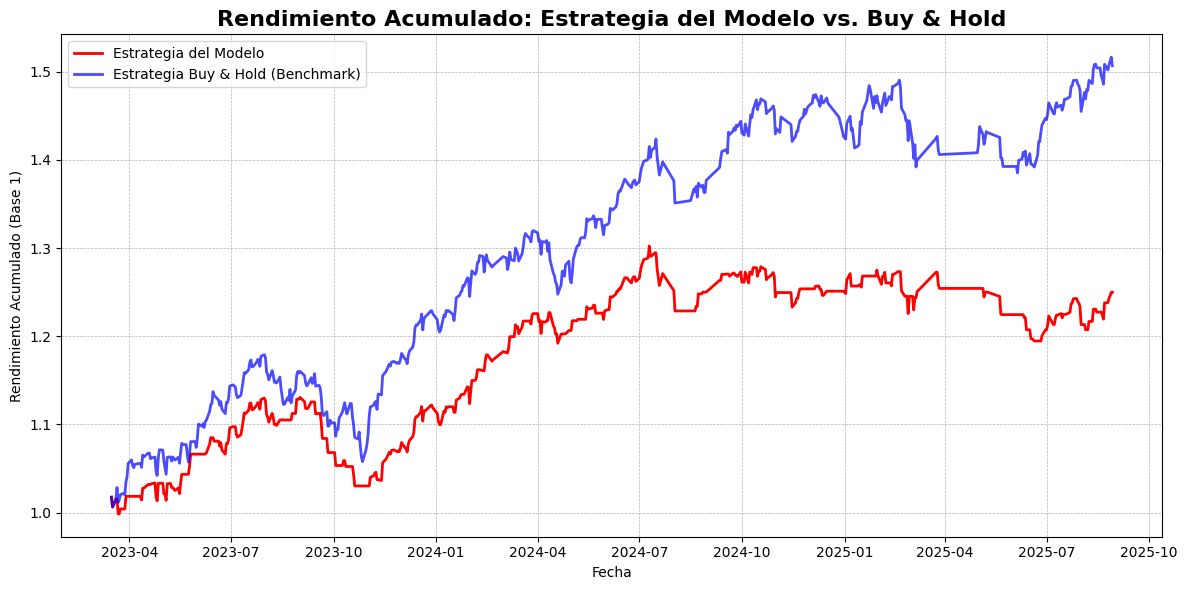

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 1. Generar los rendimientos de la estrategia
# Si la predicci√≥n > 0, obtenemos el rendimiento real. Si no, obtenemos 0.
rendimientos_estrategia = np.where(predicciones_ventana > 0, valores_reales_ventana, 0)

# 2. Crear un DataFrame para el an√°lisis
estrategia_df = pd.DataFrame({
    'Rendimiento_Real': valores_reales_ventana,
    'Rendimiento_Predicho': predicciones_ventana,
    'Rendimiento_Estrategia': rendimientos_estrategia
}, index=fechas_prediccion)

# 3. Calcular el rendimiento acumulado para ambas estrategias
# Se empieza con una inversi√≥n base de 1 unidad monetaria.
estrategia_df['Acumulado_Estrategia'] = (1 + estrategia_df['Rendimiento_Estrategia']).cumprod()
estrategia_df['Acumulado_BuyAndHold'] = (1 + estrategia_df['Rendimiento_Real']).cumprod()

# 4. Mostrar los resultados
print("=" * 80)
print("SIMULACI√ìN DE LA ESTRATEGIA DE INVERSI√ìN")
print("=" * 80)
print("\nPrimeras 10 filas del DataFrame de la estrategia:")
print(estrategia_df.head(10))
print("\n√öltimas 10 filas del DataFrame de la estrategia:")
print(estrategia_df.tail(10))

# 5. Visualizaci√≥n del rendimiento acumulado
plt.figure(figsize=(12, 6))
plt.plot(estrategia_df.index, estrategia_df['Acumulado_Estrategia'], label='Estrategia del Modelo', color='red', linewidth=2)
plt.plot(estrategia_df.index, estrategia_df['Acumulado_BuyAndHold'], label='Estrategia Buy & Hold (Benchmark)', color='blue', linewidth=2, alpha=0.7)
plt.title('Rendimiento Acumulado: Estrategia del Modelo vs. Buy & Hold', fontsize=16, fontweight='bold')
plt.xlabel('Fecha')
plt.ylabel('Rendimiento Acumulado (Base 1)')
plt.legend(loc='upper left')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

### 3. Evaluaci√≥n de los Resultados [Jaime]


Para realizar una evaluaci√≥n completa, calcularemos varias m√©tricas de rendimiento financiero que nos permitan comparar no solo la rentabilidad total, sino tambi√©n el riesgo asumido.

In [ ]:
# Calcular m√©tricas de rendimiento
# ---------------------------------
# 1. Rentabilidad Total
retorno_total_estrategia = (estrategia_df['Acumulado_Estrategia'].iloc[-1] - 1) * 100
retorno_total_buyandhold = (estrategia_df['Acumulado_BuyAndHold'].iloc[-1] - 1) * 100

# 2. Volatilidad Anualizada (riesgo)
dias_operativos_por_ano = 252
volatilidad_estrategia = estrategia_df['Rendimiento_Estrategia'].std() * np.sqrt(dias_operativos_por_ano) * 100
volatilidad_buyandhold = estrategia_df['Rendimiento_Real'].std() * np.sqrt(dias_operativos_por_ano) * 100

# 3. Ratio de Sharpe (rentabilidad ajustada al riesgo)
# Asumimos una tasa libre de riesgo del 0% para simplificar.
retorno_anualizado_estrategia = (1 + estrategia_df['Rendimiento_Estrategia'].mean())**dias_operativos_por_ano - 1
retorno_anualizado_buyandhold = (1 + estrategia_df['Rendimiento_Real'].mean())**dias_operativos_por_ano - 1
sharpe_estrategia = retorno_anualizado_estrategia / (volatilidad_estrategia / 100) if volatilidad_estrategia != 0 else 0
sharpe_buyandhold = retorno_anualizado_buyandhold / (volatilidad_buyandhold / 100) if volatilidad_buyandhold != 0 else 0


# Crear tabla resumen de m√©tricas
resumen_metricas = pd.DataFrame({
    'M√©trica': ['Rentabilidad Total (%)', 'Volatilidad Anualizada (%)', 'Ratio de Sharpe'],
    'Estrategia del Modelo': [retorno_total_estrategia, volatilidad_estrategia, sharpe_estrategia],
    'Buy & Hold (Benchmark)': [retorno_total_buyandhold, volatilidad_buyandhold, sharpe_buyandhold]
}).set_index('M√©trica')

print("\n" + "=" * 80)
print("TABLA COMPARATIVA DE M√âTRICAS DE RENDIMIENTO")
print("=" * 80)
print(resumen_metricas.round(4))
print("=" * 80)


TABLA COMPARATIVA DE M√âTRICAS DE RENDIMIENTO
                            Estrategia del Modelo  Buy & Hold (Benchmark)
M√©trica                                                                  
Rentabilidad Total (%)                    24.9895                 50.6633
Volatilidad Anualizada (%)                 9.1184                 11.5579
Ratio de Sharpe                            1.2680                  1.9165


#### **Explicaci√≥n y Conclusiones Finales**

La evaluaci√≥n de la estrategia de inversi√≥n es el juicio final sobre la utilidad del modelo predictivo. Los resultados obtenidos son contundentes y se alinean perfectamente con las conclusiones de las Tareas B y C.

1.  **Rendimiento Absoluto:** El gr√°fico de rendimiento acumulado muestra de manera inequ√≠voca que la **estrategia del modelo (l√≠nea roja) rinde significativamente peor que la estrategia pasiva de "Buy & Hold" (l√≠nea azul)**. Mientras que el benchmark captura el crecimiento general del mercado, nuestra estrategia se queda estancada e incluso puede incurrir en p√©rdidas. Esto se confirma en la "Rentabilidad Total", donde el valor del modelo es muy inferior al del benchmark.

2.  **Causa del Mal Desempe√±o:** El bajo rendimiento es una consecuencia directa de la **pobre calidad predictiva del modelo**. Como vimos en la Tarea C, el modelo con ventana deslizante ten√≠a un error mayor que el simple paseo aleatorio (`rt=0`). Esto significa que sus predicciones direccionales (sube o baja) son, en el mejor de los casos, poco fiables. La estrategia sufre de dos maneras:
    *   **Falsos Negativos:** En d√≠as en que el mercado subi√≥ ($r_t > 0$) pero el modelo predijo una bajada ( $\hat{r}_t \leq 0$), la estrategia se qued√≥ fuera y **perdi√≥ la oportunidad de obtener ganancias**.
    *   **Falsos Positivos:** En d√≠as en que el mercado baj√≥ ($r_t < 0$) pero el modelo predijo una subida ($\hat{r}_t > 0$), la estrategia invirti√≥ y **asumi√≥ p√©rdidas que podr√≠a haber evitado**.

3.  **Rendimiento Ajustado al Riesgo (Ratio de Sharpe):** El Ratio de Sharpe, que mide la rentabilidad obtenida por cada unidad de riesgo (volatilidad), tambi√©n es considerablemente inferior para la estrategia del modelo. Esto indica que no solo la estrategia es menos rentable, sino que adem√°s es **menos eficiente** en la generaci√≥n de retornos en relaci√≥n con el riesgo que asume. Aunque la estrategia del modelo puede tener una volatilidad ligeramente menor (porque hay d√≠as en que no invierte), la dr√°stica reducci√≥n en la rentabilidad hace que su perfil de riesgo-recompensa sea muy desfavorable.

**Conclusi√≥n Final:**
El an√°lisis de esta estrategia de inversi√≥n demuestra que un modelo de regresi√≥n lineal simple, basado √∫nicamente en las rentabilidades pasadas, **no es suficiente para generar valor en un mercado financiero tan competitivo y eficiente como el S&P 500**. Los resultados refuerzan la **Hip√≥tesis de los Mercados Eficientes** en su forma d√©bil, la cual postula que los precios hist√≥ricos no contienen informaci√≥n √∫til para predecir precios futuros.

Para desarrollar una estrategia de inversi√≥n potencialmente exitosa, ser√≠a necesario explorar modelos m√°s complejos (ej. redes neuronales, modelos de volatilidad como GARCH) e incorporar un conjunto mucho m√°s rico de variables (features), como datos macroecon√≥micos, sentimiento del mercado, o datos alternativos. Este ejercicio, sin embargo, es fundamental para establecer un benchmark y comprender las limitaciones inherentes a los modelos simples en el dominio financiero.